***Mathematical Methods for Engineers (MathEng)***

**EXAM**

**December 2021**
```
Duration: 2 hrs, all documents and calculators permitted
ATTEMPT ALL QUESTIONS – ANSWER IN ENGLISH
```

# Determine an expression for the complex Fourier series of the periodic sawtooth waveform illustrated in Figure Q1.

<img src=images/Figure-Q1.png width='30%' height='30%' > </img>

\includegraphics[width=0.3\textwidth]{images/Figure-Q1.png}

[6 marks]

In [1]:
using FFTW, LinearAlgebra, Plots, LaTeXStrings

In [2]:
include("../modules/operations.jl");

In [3]:
# Define the Fourier coefficients C_k
function C_k(k)
    if k == 0
        return 0.0  # C_0 is zero for the sawtooth signal
    else
        return (j * π * k * (ℯ^(2j * π * k) + 1) - (ℯ^(2j * π * k) - 1)) / (2π * k^2) * ℯ^(-j * π * k)
    end
end

# Define the Fourier series reconstruction
function sawtooth_reconstruction(t, N)
    ∑(real(C_k(k) * ℯ^(j * k * t)) for k in -N:N)
end

# Original sawtooth function
function sawtooth_original(t)
    t
end

sawtooth_original (generic function with 1 method)

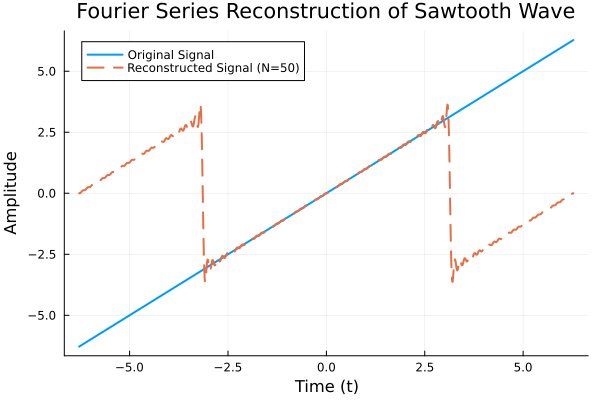

In [4]:
# Time range for visualization
T = 2π  # Period
t = -T:0.01:T  # Time values for one period

# Number of terms in Fourier series
N = 50  # Adjust for higher accuracy

# Plot the original and reconstructed signals

# Original signal
plot(t, [sawtooth_original(tᵢ) for tᵢ in t]
    , label="Original Signal", lw=2
    , title = "Fourier Series Reconstruction of Sawtooth Wave"
    , xlabel = "Time (t)", ylabel = "Amplitude"
)
# Reconstructed signal
plot!(t, [sawtooth_reconstruction(tᵢ, N) for tᵢ in t] 
    , label="Reconstructed Signal (N=$N)", lw=2, linestyle=:dash
)

# **Determine bases for the column, row, and null spaces of**  
$$
A = LU = E^{-1}R = 
\begin{bmatrix}
1 & 0 & 0 \\
2 & 1 & 0 \\
5 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 3 & 0 & 5 \\
0 & 0 & 1 & 6 \\
0 & 0 & 0 & 0
\end{bmatrix}
$$
**and state the dimensions of each.**

To determine the bases and dimensions for the column space, row space, and null space of $ A $, let's break the task into steps:

### 1. Compute the matrix $ A $
The product $A = LU = \begin{bmatrix} 1 & 0 & 0 \\ 2 & 1 & 0 \\ 5 & 0 & 1 \end{bmatrix} \begin{bmatrix} 1 & 3 & 0 & 5 \\ 0 & 0 & 1 & 6 \\ 0 & 0 & 0 & 0 \end{bmatrix}$ can be calculated as:

$$
A = 
\begin{bmatrix}
1 & 3 & 0 & 5 \\
2 & 6 & 1 & 16 \\
5 & 15 & 0 & 25
\end{bmatrix}
$$

### 2. Determine the column space
The column space of $ A $ consists of the linearly independent columns of $ A $. Perform Gaussian elimination to determine the pivot columns.

After row reduction, the pivot columns are the 1st and 2nd columns of $ A $. Thus, the basis for the column space is:
$$
\text{Basis for Column Space} = 
\left\{
\begin{bmatrix}
1 \\ 2 \\ 5
\end{bmatrix}, 
\begin{bmatrix}
3 \\ 6 \\ 15
\end{bmatrix}
\right\}.
$$

The dimension of the column space is $ \text{dim}(\text{Col}(A)) = 2 $.

### 3. Determine the row space
The row space is the span of the linearly independent rows of $ A $. From $ A $, the row-reduced echelon form is:
$
\text{RREF}(A) =
\begin{bmatrix}
1 & 3 & 0 & 5 \\
0 & 0 & 1 & 6 \\
0 & 0 & 0 & 0
\end{bmatrix}.
$

The independent rows are the 1st and 2nd rows. Thus, the basis for the row space is:
$$
\text{Basis for Row Space} = 
\left\{
\begin{bmatrix}
1 & 3 & 0 & 5
\end{bmatrix},
\begin{bmatrix}
0 & 0 & 1 & 6
\end{bmatrix}
\right\}.
$$

The dimension of the row space is $\text{dim}(\text{Row}(A)) = 2$.

### 4. Determine the null space
The null space of $A$ consists of all solutions to $A x = 0$. Write $A$ in augmented form and solve using row reduction:
$$
\begin{bmatrix}
1 & 3 & 0 & 5 \\
0 & 0 & 1 & 6 \\
0 & 0 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\ x_3 \\ x_4
\end{bmatrix}
=
\begin{bmatrix}
0 \\ 0 \\ 0
\end{bmatrix}.
$$

From the row-reduced form, express the free variables $ x_2 $ and $ x_4 $ in terms of the pivot variables:
$
x_1 = -3x_2 - 5x_4, \quad x_3 = -6x_4.
$

The general solution is:
$$
x =
x_2
\begin{bmatrix}
-3 \\ 1 \\ 0 \\ 0
\end{bmatrix}
+
x_4
\begin{bmatrix}
-5 \\ 0 \\ -6 \\ 1
\end{bmatrix}.
$$

The basis for the null space is:
$$
\text{Basis for Null Space} =
\left\{
\begin{bmatrix}
-3 \\ 1 \\ 0 \\ 0
\end{bmatrix},
\begin{bmatrix}
-5 \\ 0 \\ -6 \\ 1
\end{bmatrix}
\right\}.
$$

The dimension of the null space is $ \text{dim}(\text{Null}(A)) = 2 $.

### Summary of Results
| **Space**        | **Basis**                                                                                      | **Dimension** |
|-------------------|-----------------------------------------------------------------------------------------------|---------------|
| Column Space      | $\left\{ \begin{bmatrix} 1 \\ 2 \\ 5 \end{bmatrix}, \begin{bmatrix} 3 \\ 6 \\ 15 \end{bmatrix} \right\} $ | $ 2$       |
| Row Space         | $\left\{ \begin{bmatrix} 1 & 3 & 0 & 5 \end{bmatrix}, \begin{bmatrix} 0 & 0 & 1 & 6 \end{bmatrix} \right\}$ | $ 2 $       |
| Null Space        | $\left\{ \begin{bmatrix} -3 \\ 1 \\ 0 \\ 0 \end{bmatrix}, \begin{bmatrix} -5 \\ 0 \\ -6 \\ 1 \end{bmatrix} \right\}$ | $ 2 $       |